In [185]:
#1.
for Mw in (6,7,8):
    Mo=(10**(3/2*(10.7+Mw)))
    print('Mw=',Mw,'Mo=',Mo,'units:ergs(dyne-cm)')

Mw= 6 Mo= 1.1220184543019561e+25 units:ergs(dyne-cm)
Mw= 7 Mo= 3.548133892335731e+26 units:ergs(dyne-cm)
Mw= 8 Mo= 1.122018454301956e+28 units:ergs(dyne-cm)


In [184]:
#2.
#a.
for Mw  in[7.1]:
    Mo_7=(10**(3/2*(10.7+Mw)))
    print('2a.Ans:','Mo(Seismic Moment)=',Mo_7,'units:ergs')
    
#b.
#. If the slip rate of the fault is 0.5 cm/yr, fault rupture of 55 km,down-dip width(W) of 15 km

L=55*100000 #(km to cm)
W=15*100000
A=L*W
y=1
D=0.5*y
u=3*10**11
Mo=u*A*D
print('2b(1).Ans:','Mo=',Mo,'units:ergs/year')
print('2b(2).Ans:',Mo_7/Mo,'Years')

2a.Ans: Mo(Seismic Moment)= 5.0118723362726736e+26 units:ergs
2b(1).Ans: Mo= 1.2375e+24 units:ergs/year
2b(2).Ans: 404.9997847493069 Years


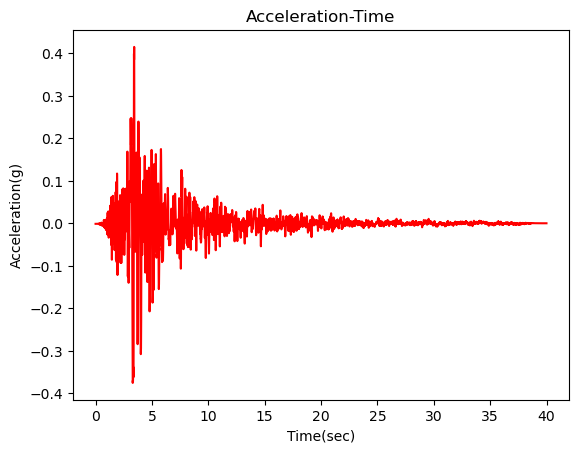

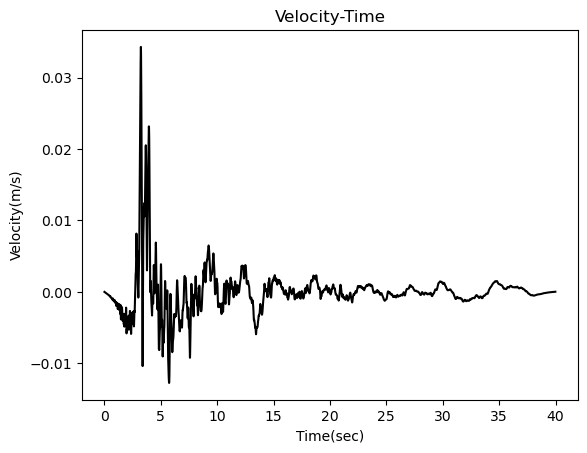

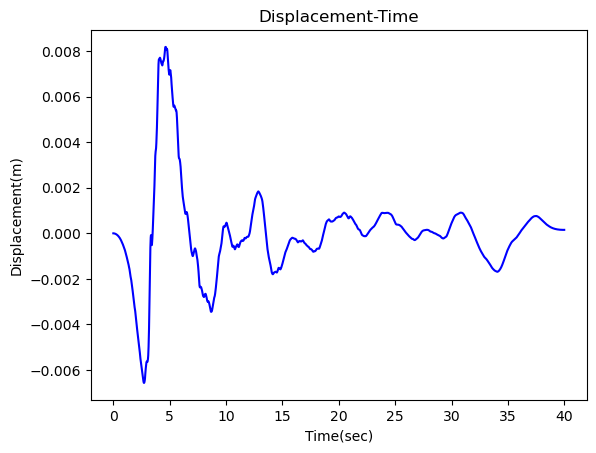

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


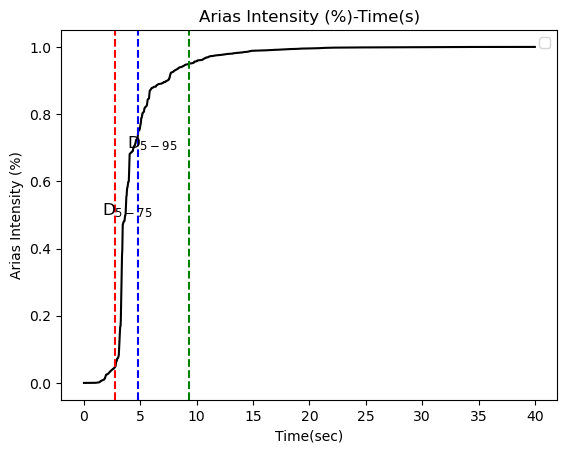

D5-75 2.01 (sec)
D5-95 4.54 (sec)


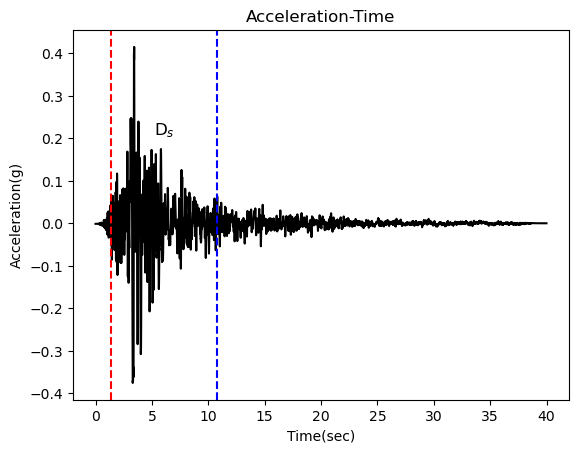

Ds= 9.415 (sec)


In [386]:
#3.
#a.1
import matplotlib.pyplot as plt

x_values = []
y_values = []
data = np.genfromtxt('RSN765_LOMAP_G01000.txt', delimiter='\t', skip_header=1)

# 提取时间和加速度数据
time = data[:, 0]
acceleration = data[:, 1]
with open('RSN765_LOMAP_G01000.txt', 'r') as file:
    next(file)
    for line in file:
        columns = line.split()  # 使用空格分割行中的列
        if len(columns) >= 2:
            x_values.append(float(columns[0]))
            y_values.append(float(columns[1]))
#plt.scatter(x_values, y_values, color='r', marker='o',s=10,facecolor='none',linewidths=0.5,alpha=0.5)
plt.plot(x_values, y_values, linestyle='-', color='red', label='Connected Points')

# 添加标签和标题
plt.xlabel('Time(sec)')
plt.ylabel('Acceleration(g)')
plt.title('Acceleration-Time')

# 显示图例
#plt.legend()

# 显示图表
plt.show()

#3.
#a.2
#velocity
V1=[]
V=0
D1=[]
D=0
#Calculate Velocity
for i in range(len(time)-1):
    y=y_values[i+1]+y_values[i]
    
    x=x_values[i+1]-x_values[i]
    
    V=V+(y*x)/2
    V1.append(V)
#Calculate Displacement
for i in range(len(time)-2):
    y2=V1[i+1]+V1[i]
    x=x_values[i+1]-x_values[i]
    D=D+(y2*x)/2
    D1.append(D)
#print(D1[0:3])
#plt.ylim(-0.003,0.003)
plt.xlabel('Time(sec)')
plt.ylabel('Velocity(m/s)')
plt.title('Velocity-Time')
plt.plot(x_values[1:len(time)], V1, linestyle='-', color='k', label='Connected Points')
plt.show()
#3.
#a.3
plt.xlabel('Time(sec)')
plt.ylabel('Displacement(m)')
plt.title('Displacement-Time')
plt.plot(x_values[1:len(time)-1], D1, linestyle='-', color='b', label='Connected Points')
plt.show()
#print(y_values[0:3],y1[0:3])

#3.
#b.
import math


import numpy as np
Ia_max = 0.0
Ia=[]
# 开始逐项积分
for i in range(1, len(time)):
    dt = time[i] - time[i-1]  # 计算时间步长
    Ia_max += (acceleration[i-1])**2 * dt  # 累积积分结果
    Ia.append(Ia_max)
AI=Ia/Ia_max
plt.xlabel('Time(sec)')
plt.ylabel('Arias Intensity (%)')
plt.title('Arias Intensity (%)-Time(s)')
plt.plot(time[1:len(time)], AI, linestyle='-', color='k')


max_AI = np.max(AI)
max_AI_index = np.argmax(AI)
percent_5 = max_AI * 0.05
percent_75 = max_AI * 0.75
percent_95 = max_AI * 0.95

# 找到对应于这些值的x
x_5 = time[np.argmin(np.abs(AI - percent_5))]
x_75 = time[np.argmin(np.abs(AI - percent_75))]
x_95 = time[np.argmin(np.abs(AI - percent_95))]
Ds1=x_75-x_5
Ds2=x_95-x_75
plt.axvline(x_5, color='red', linestyle='--')
plt.axvline(x_75, color='blue', linestyle='--')
plt.axvline(x_95, color='g', linestyle='--')

text_x = (x_5 + x_75) / 2  # 文字标签的x坐标为两条直线的中点
text_y = max_AI * 0.5  # 文字标签的y坐标为最大值的0.9倍处
plt.text(text_x, text_y, 'D$_{5-75}$', fontsize=12, ha='center')
text_x1 = (x_5 + x_95) / 2  # 文字标签的x坐标为两条直线的中点
text_y1 = max_AI * 0.7  # 文字标签的y坐标为最大值的0.9倍处

plt.text(text_x1, text_y1, 'D$_{5-95}$', fontsize=12, ha='center')
plt.legend()
plt.show()
print('D5-75',(Ds1),'(sec)')
print('D5-95',Ds2,'(sec)')



first_index = np.argmax(np.abs(acceleration) >= 0.05)
last_index = len(acceleration) - np.argmax(acceleration[::-1] >= 0.05) - 1

plt.plot(time, acceleration, linestyle='-', color='k', label='Connected Points')
plt.xlabel('Time(sec)')
plt.ylabel('Acceleration(g)')
plt.title('Acceleration-Time')
plt.axvline(time[first_index], color='red', linestyle='--')
plt.axvline(time[last_index], color='blue', linestyle='--')
text_x = (time[first_index] + time[last_index]) / 2  # 文字标签的x坐标为两条直线的中点
text_y = np.max(acceleration) * 0.5  # 文字标签的y坐标为最大值的0.9倍处
plt.text(text_x, text_y, 'D$_{s}$', fontsize=12, ha='center')

plt.show()
print('Ds=',time[last_index]-time[first_index],'(sec)')

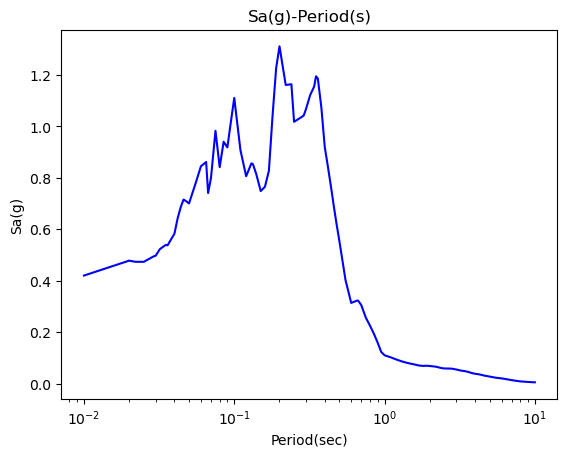

Tp= 0.2 (sec)
Sa_Max= 1.310393 (g)


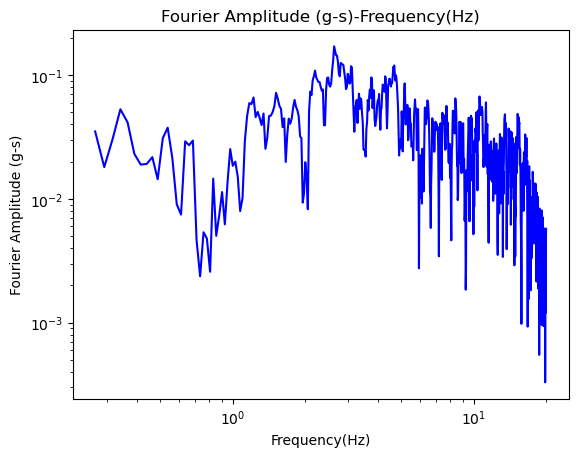

Tm= 0.2927657957195593 (sec)


In [387]:
#3.
#c.
import pandas as pd
import numpy as np
df = pd.read_excel('HW1_Ground Motion Data_rev.xlsx')


P = df['Period (sec)']
Sa = df['RSN-765 Horizontal-1 pSa (g)']
plt.xscale('log')
#plt.ylim(0.001,10)
plt.xlabel('Period(sec)')
plt.ylabel('Sa(g)')
plt.title('Sa(g)-Period(s)')
plt.plot((P), Sa, linestyle='-', color='b', label='Connected Points')
plt.show()
max_Sa = np.max(Sa)
max_Sa_index = np.argmax(Sa)


Tp= P[max_Sa_index]
print('Tp=',Tp,'(sec)')
print('Sa_Max=',max_Sa,'(g)')

#3.
#d.
df2 = pd.read_excel('HW1_Ground Motion Data_rev.xlsx',sheet_name=1)
F=df2['Frequency (Hz)']
A=df2['Fourier Amplitude (g-s)']
FF=df2['Fourier Phase (rad)']

filtered_df = df2[(F >= 0.25) & (F <= 20)]

F= filtered_df['Frequency (Hz)']
A= filtered_df['Fourier Amplitude (g-s)']

#Calculate the Tm

K1=(A**2/F).sum()
K2=(A**2).sum()
Tm=K1/K2

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Fourier Amplitude (g-s)')
plt.title('Fourier Amplitude (g-s)-Frequency(Hz)')
plt.plot(F, A, linestyle='-', color='b', label='Connected Points')
plt.show()
print('Tm=',Tm,'(sec)')